### Please complete the following sections sequentially to complete this assignment.

##### <span style="color:red">Note: You can create as many code or markdown cells as you deem necessary to answer each question. However, please leave the problems unchanged. We will evaluate your solutions by executing your code sequentially.</span> 
---

**Within the expansion of the Internet and Web, there has also been a growing interest in online articles and reviews, which allows an easy and fast spread of information worldwide. Thus, predicting the popularity of online news has become a trend. Popularity is often measured by considering the number of interactions in the Web and social networks (e.g., number of shares, likes, and comments). Predicting such popularity is valuable for advertisers, authors, content providers, and even activists/politicians (e.g., to understand or influence public opinion). In this assignment, we use a news popularity dataset utilized by Fernandes et al. (2015) based on the articles published by [Mashable](https://mashable.com/) from January 7, 2013, to January 7, 2015.**

**<span style="color:red">The objective of this assignment is to predict the number of times a news article is shared. </span> The assignment's dataset is included in the homework's zipped folder. Table below has the description of each variable in the dataset.**

| Variable                      | Description                                                                       |
|-------------------------------|-----------------------------------------------------------------------------------|
| url                           | URL of the article (non-predictive)                                               |
| timedelta                     | Days between the article publication and the dataset acquisition (non-predictive) |
| n_tokens_title                | Number of words in the title                                                      |
| n_tokens_content              | Number of words in the content                                                    |
| n_unique_tokens               | Rate of unique words in the content                                               |
| n_non_stop_words              | Rate of non-stop words in the content                                             |
| n_non_stop_unique_tokens      | Rate of unique non-stop words in the content                                      |
| num_hrefs                     | Number of links                                                                   |
| num_self_hrefs                | Number of links to other articles published by Mashable                           |
| num_imgs                      | Number of images                                                                  |
| num_videos                    | Number of videos                                                                  |
| average_token_length          | Average length of the words in the content                                        |
| num_keywords                  | Number of keywords in the metadata                                                |
| data_channel_is_lifestyle     | Is data channel 'Lifestyle'?                                                      |
| data_channel_is_entertainment | Is data channel 'Entertainment'?                                                  |
| data_channel_is_bus           | Is data channel 'Business'?                                                       |
| data_channel_is_socmed        | Is data channel 'Social Media'?                                                   |
| data_channel_is_tech          | Is data channel 'Tech'?                                                           |
| data_channel_is_world         | Is data channel 'World'?                                                          |
| kw_min_min                    | Min. shares of the Worst keyword in the article                                   |
| kw_max_min                    | Max. shares of the Worst keyword in the article                                   |
| kw_avg_min                    | Avg. shares of the Worst keyword in the article                                   |
| kw_min_max                    | Min. shares of the best keyword in the article                                    |
| kw_max_max                    | Max. shares of the best keyword in the article                                    |
| kw_avg_max                    | Avg. shares of the best keyword in the article                                    |
| kw_min_avg                    | Min. shares of the average keyword in the article                                 |
| kw_max_avg                    | Max. shares of the average keyword in the article                                 |
| kw_avg_avg                    | Avg. shares of the average keyword in the article                                 |
| self_reference_min_shares     | Min. shares of referenced articles in Mashable                                    |
| self_reference_max_shares     | Max. shares of referenced articles in Mashable                                    |
| self_reference_avg_sharess    | Avg. shares of referenced articles in Mashable                                    |
| weekday_is_monday             | Was the article published on a Monday?                                            |
| weekday_is_tuesday            | Was the article published on a Tuesday?                                           |
| weekday_is_wednesday          | Was the article published on a Wednesday?                                         |
| weekday_is_thursday           | Was the article published on a Thursday?                                          |
| weekday_is_friday             | Was the article published on a Friday?                                            |
| weekday_is_saturday           | Was the article published on a Saturday?                                          |
| weekday_is_sunday             | Was the article published on a Sunday?                                            |
| is_weekend                    | Was the article published on the weekend?                                         |
| LDA_00                        | Closeness to LDA topic 0                                                          |
| LDA_01                        | Closeness to LDA topic 1                                                          |
| LDA_02                        | Closeness to LDA topic 2                                                          |
| LDA_03                        | Closeness to LDA topic 3                                                          |
| LDA_04                        | Closeness to LDA topic 4                                                          |
| global_subjectivity           | Text subjectivity                                                                 |
| global_sentiment_polarity     | Text sentiment polarity                                                           |
| global_rate_positive_words    | Rate of positive words in the content                                             |
| global_rate_negative_words    | Rate of negative words in the content                                             |
| rate_positive_words           | Rate of positive words among non-neutral tokens                                   |
| rate_negative_words           | Rate of negative words among non-neutral tokens                                   |
| avg_positive_polarity         | Avg. polarity of positive words                                                   |
| min_positive_polarity         | Min. polarity of positive words                                                   |
| max_positive_polarity         | Max. polarity of positive words                                                   |
| avg_negative_polarity         | Avg. polarity of negative words                                                   |
| min_negative_polarity         | Min. polarity of negative words                                                   |
| max_negative_polarity         | Max. polarity of negative words                                                   |
| title_subjectivity            | Title subjectivity                                                                |
| title_sentiment_polarity      | Title polarity                                                                    |
| abs_title_subjectivity        | Absolute subjectivity level                                                       |
| abs_title_sentiment_polarity  | Absolute polarity level                                                           |
| **shares (Target)**           | **Number of shares**                                                              |
| popular (DO NOT USE)          | whether the article is popular (yes/no)                                           |

Reference:

Fernandes, K., Vinagre, P., & Cortez, P. (2015, September). A proactive intelligent decision support system for predicting the popularity of online news. In Portuguese Conference on Artificial Intelligence (pp. 535-546). Springer, Cham.

---
### Import Packages and Read the Data

**Before starting the assignment, import all necessary libraries and read the dataset into the Python environment.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, RocCurveDisplay, auc, r2_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn import tree

from pydotplus import graph_from_dot_data

# Generate a unique color
def generate_unique_color():
    color = "#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])
    return color

df = pd.read_csv('online_news_popularity.csv')

---
### Introduction to Regression Trees

**1- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=403295c8-1da1-4c46-a3ed-acd9002069dd) for an intorudction to regression trees.**

**2- Briefly describe how regression trees work. (10 pts)**

- **Regression trees:** Work by recursively partitioning the input space into smaller regions based on the values of input features. The tree is built by selecting the feature and split point that minimizes the sum of squared errors within each region. The resulting tree can be used to make predictions by traversing the tree from the root to a leaf node, where the predicted value is the average of the training samples within that leaf node.

**3- What are the similarities of classification and regression tree models? (10 pts)**

- Classification and regression tree models share similarities in their decision-making process, use of splitting criteria, hierarchical structure, predictive capabilities, and interpretability.

**4- What are the differences of classification and regression tree models? (10 pts)**

- Classification tree models are used for predicting categorical or discrete outcomes, while regression tree models are used for predicting continuous or numeric outcomes.

**5- How is MSE used in regression trees? (10 pts)**

- Mean Squared Error (MSE) is used as a metric to evaluate the quality of splits during the tree-building process. MSE measures the average squared difference between the predicted and actual values of the target variable. The tree algorithm aims to minimize the MSE by selecting the splitting criteria that leads to the smallest MSE in each node, ultimately producing a regression tree with the least overall prediction error.

**6- Why does overfitting happen in regression trees? and how can it be avoided? (10 pts)**

- Overfitting in regression trees occurs when the model becomes too complex and captures noise or random fluctuations in the training data, leading to poor performance on unseen data. To avoid overfitting, techniques such as pruning, , cross-validation, and feature selection can be used to improve the model's generalization and prevent the capture of irrelevant details.

---
### Regression Trees in Python

**7- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=bd5b0d61-6837-4d54-b2b4-acd9002071b8) to learn about implementing regression trees in Python. The video's dataset is included in the assignment zipped folder, in case you want to replicate the codes.**

**8- Check if there are any missing values and take care of them if needed. (5 pts)**

In [2]:
df.isna().sum(axis=0)

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
channel                         0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
weekday                         0
is_weekend                      0
LDA_00                          0
LDA_01        

**9- Detect and eliminate the outliers of these variables: ```['LDA_02', 'LDA_03', 'LDA_04']``` (10 pts)**

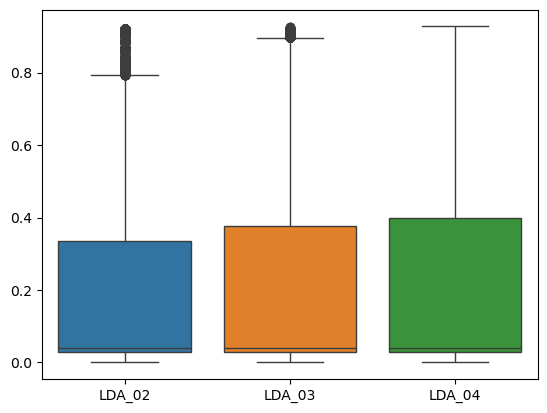

In [3]:
columns = ['LDA_02', 'LDA_03', 'LDA_04']
sns.boxplot(data=df[columns])
plt.show()

In [4]:
df_clean = df.copy()
var_list = ['LDA_02', 'LDA_03', 'LDA_04']

for var in var_list:
    iqr = df_clean[var].quantile(0.75) - df_clean[var].quantile(0.25)
    if not np.isnan(iqr):
        ub = df_clean[var].quantile(0.75) + 1.5 * iqr
        lb = df_clean[var].quantile(0.25) - 1.5 * iqr
        df_clean = df_clean[(df_clean[var] >= lb) & (df_clean[var] <= ub)]

print(df.shape)        
print(df_clean.shape)

(39644, 51)
(36103, 51)


**10- Dummy encode all categorical variables. (5 pts)**

In [5]:
cats = ['channel', 'weekday']
df1 = pd.get_dummies(df_clean, columns=cats, drop_first=True)
df1.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular,channel_entertainment,channel_lifestyle,channel_other,channel_social_media,channel_tech,channel_world,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,no,1,0,0,0,0,0,1,0,0,0,0,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,no,0,0,0,0,0,0,1,0,0,0,0,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,yes,0,0,0,0,0,0,1,0,0,0,0,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,no,1,0,0,0,0,0,1,0,0,0,0,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,no,0,0,0,0,1,0,1,0,0,0,0,0


**11- Partition the data (Consider 80% of the data as train). (5 pts)**

In [6]:
var_list = ['n_tokens_title', 'n_tokens_content',
               'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
               'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
               'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
               'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
               'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
               'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
               'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
               'global_sentiment_polarity', 'global_rate_positive_words',
               'global_rate_negative_words', 'rate_positive_words',
               'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
               'max_positive_polarity', 'avg_negative_polarity',
               'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
               'title_sentiment_polarity', 'abs_title_subjectivity',
               'abs_title_sentiment_polarity',
               'channel_entertainment', 'channel_lifestyle', 'channel_other',
               'channel_social_media', 'channel_tech', 'channel_world',
               'weekday_monday', 'weekday_saturday', 'weekday_sunday',
               'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday']

X = df1[var_list]
y = df1['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**12- Using proper input variables, build a regression tree that predicts the number of times a news article is shared. After building your model, do the following: (30 pts)**
* __Calculate the $ r^2 $ and MSE of the model on the train data,__
* __Visulaize the tree,__
* __Set the parameters of the regression tree such that it does not overfit the data.__

In [7]:
# ways of pruning classification tree: dec_tree = tree.DecisionTreeClassifier(min_samples_split=5000, max_leaf_nodes=10, ccp_alpha=0.005) can be used to set restrictions on the splits of the data
dec_tree = tree.DecisionTreeRegressor(max_leaf_nodes=100)
dec_tree.fit(X_train, y_train)

# predict
y_train_hat = dec_tree.predict(X_train)

print('train r2:', "{:.2f}%".format(r2_score(y_train, y_train_hat)*100))
print('train MSE:', "{:.2f}%".format(mean_squared_error(y_train, y_train_hat)*100))

train r2: 69.66%
train MSE: 4643085029.94%


In [8]:
text_representation = tree.export_text(dec_tree, feature_names=var_list)
print(text_representation)

|--- kw_avg_avg <= 3640.96
|   |--- self_reference_avg_sharess <= 5904.64
|   |   |--- kw_max_avg <= 3853.02
|   |   |   |--- value: [2081.58]
|   |   |--- kw_max_avg >  3853.02
|   |   |   |--- LDA_01 <= 0.92
|   |   |   |   |--- value: [2884.57]
|   |   |   |--- LDA_01 >  0.92
|   |   |   |   |--- n_tokens_content <= 2532.50
|   |   |   |   |   |--- average_token_length <= 4.31
|   |   |   |   |   |   |--- avg_positive_polarity <= 0.41
|   |   |   |   |   |   |   |--- value: [87600.00]
|   |   |   |   |   |   |--- avg_positive_polarity >  0.41
|   |   |   |   |   |   |   |--- value: [20950.00]
|   |   |   |   |   |--- average_token_length >  4.31
|   |   |   |   |   |   |--- value: [1384.56]
|   |   |   |   |--- n_tokens_content >  2532.50
|   |   |   |   |   |--- value: [210300.00]
|   |--- self_reference_avg_sharess >  5904.64
|   |   |--- n_unique_tokens <= 0.24
|   |   |   |--- global_subjectivity <= 0.41
|   |   |   |   |--- value: [10479.00]
|   |   |   |--- global_subjectivity

In [10]:
dot_data = tree.export_graphviz(dec_tree, feature_names=var_list, rounded=True, filled=True)
graph = graph_from_dot_data(dot_data)
graph.write_pdf('tree.pdf')

InvocationException: Program terminated with status: 1. stderr follows: Warning: Could not load "C:\Users\Chaye\anaconda3\Library\bin\gvplugin_pango.dll" - It was found, so perhaps one of its dependents was not.  Try ldd.
Warning: Could not load "C:\Users\Chaye\anaconda3\Library\bin\gvplugin_pango.dll" - It was found, so perhaps one of its dependents was not.  Try ldd.
Format: "pdf" not recognized. Use one of: bmp canon cmap cmapx cmapx_np dot dot_json emf emfplus eps fig gd gd2 gif gv imap imap_np ismap jpe jpeg jpg json json0 metafile mp pdf pic plain plain-ext png pov ps ps2 svg svg_inline svgz tif tiff tk vrml webp xdot xdot1.2 xdot1.4 xdot_json


**13- Test the tree you built on the test data by calculating the $ r^2 $ and MSE of the model on the test data: (10 pts)**

In [ ]:
y_test_hat = dec_tree.predict(X_test)

print('test r2:', "{:.2f}%".format(r2_score(y_test, y_test_hat)*100))
print('test MSE:', "{:.2f}%".format(mean_squared_error(y_test, y_test_hat)*100))

**14- Comparing your train and test results, do you see any evidence of overfitting? Explain. (10 pts)**

- Based on the provided train and test results, there is evidence of overfitting in the model. The high R2 score of 68.81% on the training set suggests a reasonably good fit, but the significantly lower R2 score of -83.21% on the test set indicates poor performance and a lack of generalization. Additionally, the much higher MSE value on the test set compared to the training set further suggests overfitting, as the model's predictions are considerably less accurate on unseen data.

**15- Which variables are the most important ones? Sort and show the input variables based on their importance. (5 pts)**

In [ ]:
df2 = pd.DataFrame({'Variable':var_list, 'Importance':dec_tree.feature_importances_}).sort_values(by=['Importance'], ascending=False)
df2

**16- Why do you think the results of variable importance might not be reliable? (10 pts)**

- I do not think the results of the variable's importance are reliable, because the models accuracy is not reliable. It is hard to tell if the specific variable is actually important to the output when using a inaccurate model.

---
### Bonus Question

**17- When the classification counterpart of the problem was analyzed, the results were decent. However, the regression problem yielded poor results. What do you think is the reason? (20 pts)**

- One possibility is that the regression problem has a higher level of complexity or variability in the target variable, making it more challenging to accurately predict. I think permutation feature selection may be an option to try to get a more accurate linear regression model. Linear regression models are sensitive to noise, so too many variables could be affecting the model’s accuracy.